In [0]:
import re    
import nltk  
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline
train  = pd.read_excel('train.xlsx',encoding="latin-1",error_bad_lines=False) 
test  = pd.read_excel('test.xlsx',encoding="latin-1",error_bad_lines=False) 

In [61]:
train.shape

(117, 7)

In [62]:
test.shape

(16, 7)

In [63]:
train.head()

,Tweets,longitud,ID,Fecha,Fuente,Likes,RTs
0,"Es bueno pero podría ser mejor si la fórmula fuera un poco más pigmentada como un pigmento natural para labios me gusta pero como rubor deja mucho que desear, aunque dice que es para todo tipo de ...",420,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3
1,Es genial para sus dos funciones… Me deja un color super suave y hermoso en las mejillas… Y super potente en los labios… Su duración es increíble y su textura es casi imperceptible… De mis favoritos!,199,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3
2,"me encanto usarlo porque es un producto muy economico y cumple con lo que dice ,me da un brillo espetacular a mis labios y dura mucho ,yo por lo menos solo lo uso en los labios porque me da la sen...",294,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3
3,"Me encanta el efecto gloss que tiene, hace que mis labios se vean lindos e hidratados siempre además de que es muy suave y puedes usarlo siempre con maquillaje ligero diario. En las mejillas no me...",301,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3
4,"Es lo más práctico,hermoso y económico que he visto, este producto me encanta porque cumple dos funciones y las cumple excelente…\npara mis labios deja un acabado muy lindo y hace que se vean bast...",401,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3


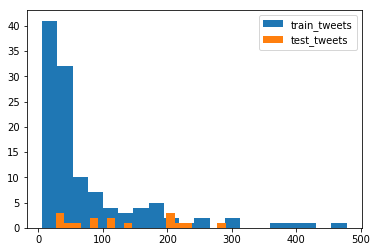

In [64]:
length_train = train['Tweets'].str.len()
length_test = test['Tweets'].str.len() 
plt.hist(length_train, bins=20, label="train_tweets") 
plt.hist(length_test, bins=20, label="test_tweets") 
plt.legend() 
plt.show()

In [65]:
####Se combina las dos bases para la limpieza
combi = train.append(test, ignore_index=True) 
combi.shape

(133, 7)

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [67]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['Tweets'], "@[\w]*") 
combi.head()

,Tweets,longitud,ID,Fecha,Fuente,Likes,RTs,tidy_tweet
0,"Es bueno pero podría ser mejor si la fórmula fuera un poco más pigmentada como un pigmento natural para labios me gusta pero como rubor deja mucho que desear, aunque dice que es para todo tipo de ...",420,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"Es bueno pero podría ser mejor si la fórmula fuera un poco más pigmentada como un pigmento natural para labios me gusta pero como rubor deja mucho que desear, aunque dice que es para todo tipo de ..."
1,Es genial para sus dos funciones… Me deja un color super suave y hermoso en las mejillas… Y super potente en los labios… Su duración es increíble y su textura es casi imperceptible… De mis favoritos!,199,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,Es genial para sus dos funciones… Me deja un color super suave y hermoso en las mejillas… Y super potente en los labios… Su duración es increíble y su textura es casi imperceptible… De mis favoritos!
2,"me encanto usarlo porque es un producto muy economico y cumple con lo que dice ,me da un brillo espetacular a mis labios y dura mucho ,yo por lo menos solo lo uso en los labios porque me da la sen...",294,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"me encanto usarlo porque es un producto muy economico y cumple con lo que dice ,me da un brillo espetacular a mis labios y dura mucho ,yo por lo menos solo lo uso en los labios porque me da la sen..."
3,"Me encanta el efecto gloss que tiene, hace que mis labios se vean lindos e hidratados siempre además de que es muy suave y puedes usarlo siempre con maquillaje ligero diario. En las mejillas no me...",301,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"Me encanta el efecto gloss que tiene, hace que mis labios se vean lindos e hidratados siempre además de que es muy suave y puedes usarlo siempre con maquillaje ligero diario. En las mejillas no me..."
4,"Es lo más práctico,hermoso y económico que he visto, este producto me encanta porque cumple dos funciones y las cumple excelente…\npara mis labios deja un acabado muy lindo y hace que se vean bast...",401,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"Es lo más práctico,hermoso y económico que he visto, este producto me encanta porque cumple dos funciones y las cumple excelente…\npara mis labios deja un acabado muy lindo y hace que se vean bast..."


In [68]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[zA-Z#.]", " ") 
combi.head(10)

,Tweets,longitud,ID,Fecha,Fuente,Likes,RTs,tidy_tweet
0,"Es bueno pero podría ser mejor si la fórmula fuera un poco más pigmentada como un pigmento natural para labios me gusta pero como rubor deja mucho que desear, aunque dice que es para todo tipo de ...",420,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"s bueno pero podría ser mejor si la fórmula fuera un poco más pigmentada como un pigmento natural para labios me gusta pero como rubor deja mucho que desear, aunque dice que es para todo tipo de ..."
1,Es genial para sus dos funciones… Me deja un color super suave y hermoso en las mejillas… Y super potente en los labios… Su duración es increíble y su textura es casi imperceptible… De mis favoritos!,199,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,s genial para sus dos funciones… e deja un color super suave y hermoso en las mejillas… super potente en los labios… u duración es increíble y su textura es casi imperceptible… e mis favoritos!
2,"me encanto usarlo porque es un producto muy economico y cumple con lo que dice ,me da un brillo espetacular a mis labios y dura mucho ,yo por lo menos solo lo uso en los labios porque me da la sen...",294,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"me encanto usarlo porque es un producto muy economico y cumple con lo que dice ,me da un brillo espetacular a mis labios y dura mucho ,yo por lo menos solo lo uso en los labios porque me da la sen..."
3,"Me encanta el efecto gloss que tiene, hace que mis labios se vean lindos e hidratados siempre además de que es muy suave y puedes usarlo siempre con maquillaje ligero diario. En las mejillas no me...",301,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"e encanta el efecto gloss que tiene, hace que mis labios se vean lindos e hidratados siempre además de que es muy suave y puedes usarlo siempre con maquillaje ligero diario n las mejillas no me..."
4,"Es lo más práctico,hermoso y económico que he visto, este producto me encanta porque cumple dos funciones y las cumple excelente…\npara mis labios deja un acabado muy lindo y hace que se vean bast...",401,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"s lo más práctico,hermoso y económico que he visto, este producto me encanta porque cumple dos funciones y las cumple excelente…\npara mis labios deja un acabado muy lindo y hace que se vean bast..."
5,"Es un buen gloss, deja un color muy agradable en los labios, a la hora de aplicarlo en las mejillas, en mi caso no es muy agradable ya que al ser un producto pegajoso, la sensación no es que sea m...",209,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"s un buen gloss, deja un color muy agradable en los labios, a la hora de aplicarlo en las mejillas, en mi caso no es muy agradable ya que al ser un producto pegajoso, la sensación no es que sea m..."
6,"Es un excelente gloss ya que deja un color ligero en los labios, pero no sirve mucho para la aplicación en las mejillas, ya que al ser un producto un poco pegajoso, no a todas las personas les agr...",229,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"s un excelente gloss ya que deja un color ligero en los labios, pero no sirve mucho para la aplicación en las mejillas, ya que al ser un producto un poco pegajoso, no a todas las personas les agr..."
7,"definitivamente podria decir que no es un producto 2 en uno, creo que es un gloss y punto, ya que aplicarlo en las mejillas con lo pegajoso que es el producto no es agradable",174,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"definitivamente podria decir que no es un producto 2 en uno, creo que es un gloss y punto, ya que aplicarlo en las mejillas con lo pegajoso que es el producto no es agradable"
8,"Este producto me parece muy práctico! Ideal para sacarte apuros, o cuando queramos viajar y no llevar mucho equipaje, ya que es 2 en 1, el producto en si me gusta mucho porque es muy sencillo de a...",478,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"ste producto me parece muy práctico! deal para 

In [0]:

combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [70]:
combi

,Tweets,longitud,ID,Fecha,Fuente,Likes,RTs,tidy_tweet
0,"Es bueno pero podría ser mejor si la fórmula fuera un poco más pigmentada como un pigmento natural para labios me gusta pero como rubor deja mucho que desear, aunque dice que es para todo tipo de ...",420,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"bueno pero podría mejor fórmula fuera poco pigmentada como pigmento natural para labios gusta pero como rubor deja mucho desear, aunque dice para todo tipo piel realidad pieles medias oscuras, nec..."
1,Es genial para sus dos funciones… Me deja un color super suave y hermoso en las mejillas… Y super potente en los labios… Su duración es increíble y su textura es casi imperceptible… De mis favoritos!,199,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,genial para funciones… deja color super suave hermoso mejillas… super potente labios… duración increíble textura casi imperceptible… favoritos!
2,"me encanto usarlo porque es un producto muy economico y cumple con lo que dice ,me da un brillo espetacular a mis labios y dura mucho ,yo por lo menos solo lo uso en los labios porque me da la sen...",294,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,encanto usarlo porque producto economico cumple dice brillo espetacular labios dura mucho menos solo labios porque sensacion pegajosa mejillas utili mejillas resto encanta
3,"Me encanta el efecto gloss que tiene, hace que mis labios se vean lindos e hidratados siempre además de que es muy suave y puedes usarlo siempre con maquillaje ligero diario. En las mejillas no me...",301,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"encanta efecto gloss tiene, hace labios vean lindos hidratados siempre además suave puedes usarlo siempre maquillaje ligero diario mejillas agrada tanto porque pocas veces usado siempre deja sensa..."
4,"Es lo más práctico,hermoso y económico que he visto, este producto me encanta porque cumple dos funciones y las cumple excelente…\npara mis labios deja un acabado muy lindo y hace que se vean bast...",401,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"práctico,hermoso económico visto, este producto encanta porque cumple funciones cumple excelente… para labios deja acabado lindo hace vean bastante bien mejillas hago aplicarlo antes polvo todos p..."
5,"Es un buen gloss, deja un color muy agradable en los labios, a la hora de aplicarlo en las mejillas, en mi caso no es muy agradable ya que al ser un producto pegajoso, la sensación no es que sea m...",209,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"buen gloss, deja color agradable labios, hora aplicarlo mejillas, caso agradable producto pegajoso, sensación agradable"
6,"Es un excelente gloss ya que deja un color ligero en los labios, pero no sirve mucho para la aplicación en las mejillas, ya que al ser un producto un poco pegajoso, no a todas las personas les agr...",229,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"excelente gloss deja color ligero labios, pero sirve mucho para aplicación mejillas, producto poco pegajoso, todas personas agradaría sensación"
7,"definitivamente podria decir que no es un producto 2 en uno, creo que es un gloss y punto, ya que aplicarlo en las mejillas con lo pegajoso que es el producto no es agradable",174,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"definitivamente podria decir producto uno, creo gloss punto, aplicarlo mejillas pegajoso producto agradable"
8,"Este producto me parece muy práctico! Ideal para sacarte apuros, o cuando queramos viajar y no llevar mucho equipaje, ya que es 2 en 1, el producto en si me gusta mucho porque es muy sencillo de a...",478,CUSHION COLOR DÚO,2019-09-07,Twitter for Android,2,3,"producto parece práctico! deal para sacarte apuros, cuando queramos viajar llevar mucho equipaje, producto gusta mucho porque sencillo aplicar toque natural, embargo eres chicha chico gusta sentir..."
9,"Me encanta este producto es bastante fácil de usar, se siente súper como me encanta su textura cumple todo lo que prome

In [71]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [bueno, pero, podría, mejor, fórmula, fuera, poco, pigmentada, como, pigmento, natural, para, labios, gusta, pero, como, rubor, deja, mucho, desear,, aunque, dice, para, todo, tipo, piel, realidad...
1                                         [genial, para, funciones…, deja, color, super, suave, hermoso, mejillas…, super, potente, labios…, duración, increíble, textura, casi, imperceptible…, favoritos!]
2        [encanto, usarlo, porque, producto, economico, cumple, dice, brillo, espetacular, labios, dura, mucho, menos, solo, labios, porque, sensacion, pegajosa, mejillas, utili, mejillas, resto, encanta]
3    [encanta, efecto, gloss, tiene,, hace, labios, vean, lindos, hidratados, siempre, además, suave, puedes, usarlo, siempre, maquillaje, ligero, diario, mejillas, agrada, tanto, porque, pocas, veces,...
4    [práctico,hermoso, económico, visto,, este, producto, encanta, porque, cumple, funciones, cumple, excelente…, para, labios, deja, acabado, lindo, hace, vean, bastante, bien, m

In [0]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
combi['tidy_tweet'] = tokenized_tweet

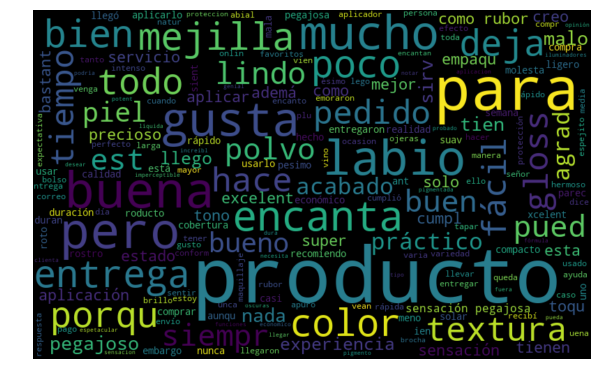

In [74]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)#
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

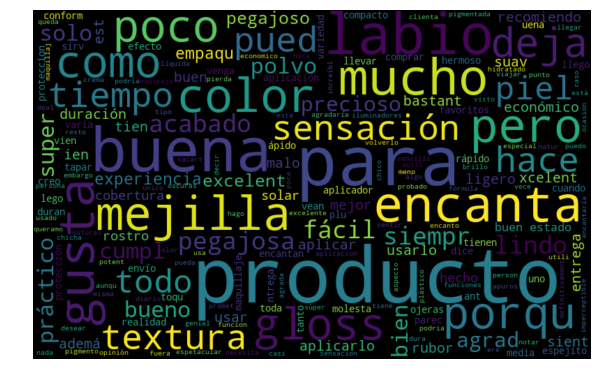

In [75]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['RTs'] == 3]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

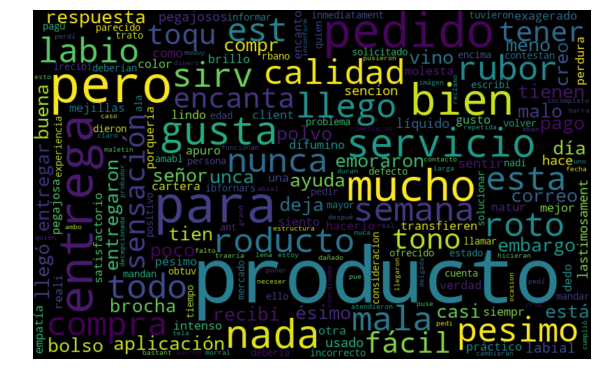

In [76]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['RTs'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off') 
plt.show()

In [77]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
nltk.download('stopwords')  
import pickle  
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
X, y = combi.tidy_tweet, combi.RTs 

In [79]:
combi.shape

(133, 8)

In [0]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(combi['tidy_tweet'],combi['RTs'],test_size=0.1)

In [0]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [0]:
Tfidf_vect = TfidfVectorizer(max_features=40)
Tfidf_vect.fit(combi['tidy_tweet'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [83]:
print(Tfidf_vect.vocabulary_)

{'bueno': 5, 'pero': 25, 'poco': 27, 'como': 7, 'para': 22, 'labio': 16, 'gusta': 14, 'rubor': 33, 'deja': 8, 'mucho': 20, 'todo': 39, 'piel': 26, 'sensación': 34, 'color': 6, 'labios': 17, 'textura': 37, 'porqu': 29, 'producto': 30, 'pegajosa': 24, 'mejilla': 19, 'encanta': 9, 'gloss': 13, 'hace': 15, 'lindo': 18, 'siempr': 35, 'pued': 32, 'práctico': 31, 'est': 11, 'acabado': 0, 'bien': 2, 'polvo': 28, 'buen': 3, 'agrad': 1, 'sirv': 36, 'nada': 21, 'fácil': 12, 'buena': 4, 'pedido': 23, 'entrega': 10, 'tiempo': 38}


In [84]:
print(Train_X_Tfidf)

  (0, 34)	0.19245986190817868
  (0, 33)	0.2135471011969868
  (0, 32)	0.20553010489558696
  (0, 31)	0.2135471011969868
  (0, 30)	0.23239858190124163
  (0, 29)	0.4110602097911739
  (0, 25)	0.1694812312279394
  (0, 24)	0.19858546681814743
  (0, 22)	0.29678798387826255
  (0, 21)	0.2135471011969868
  (0, 20)	0.3389624624558788
  (0, 18)	0.20553010489558696
  (0, 16)	0.19245986190817868
  (0, 14)	0.35499645505867855
  (0, 13)	0.20553010489558696
  (0, 7)	0.20553010489558696
  (2, 29)	1.0
  (3, 36)	0.35875296065466256
  (3, 35)	0.37468260474895715
  (3, 33)	0.35875296065466256
  (3, 31)	0.35875296065466256
  (3, 22)	0.24929761936884892
  (3, 17)	0.34528463847860275
  (3, 14)	0.29819189434168686
  (3, 9)	0.31412153843598145
  :	:
  (106, 32)	0.4804176564455706
  (106, 30)	0.2716107748180927
  (106, 29)	0.4804176564455706
  (106, 5)	0.49915703565626063
  (107, 5)	1.0
  (108, 30)	1.0
  (109, 4)	1.0
  (110, 25)	0.5340108878462795
  (110, 10)	0.6064132351866937
  (110, 2)	0.5891479948638001
  (111

In [85]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  21.428571428571427


In [86]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  21.428571428571427
